In [1]:
%load_ext autoreload
%autoreload

## This expands a notebook to full width
from IPython.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("""<style>div.output_area{max-height:10000px;overflow:scroll;}</style>"""))
## Show Python Version
import sys
print("Python: {0}".format(sys.version))

## Show Current Time
import datetime as dt
start = dt.datetime.now()
print("Notebook Last Run Initiated: "+str(start))

Python: 3.10.9 | packaged by conda-forge | (main, Jan 11 2023, 15:15:40) [MSC v.1916 64 bit (AMD64)]
Notebook Last Run Initiated: 2023-03-13 22:07:27.773940


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

np.random.seed(1)

In [4]:
embeddings    = pd.read_csv('data/project_dataset.csv',low_memory=False)

cols = [*range(300)]
cols = map(str, cols)
cols = list(cols)
cols = map(lambda c : 'col'+c,cols)
cols = list(cols)

embeddings.columns = ['accountid','userid']+cols

In [5]:
data          = pd.read_csv('data/train_data_cat.csv')
cluster_index = pd.read_csv('data/cluster_index_KMeans.csv')
targets       = pd.read_csv('data/targets.csv')

data = pd.merge(embeddings,data, on=['accountid','userid'])
data = pd.merge(data,cluster_index, on=['accountid','userid'])
data = pd.merge(data,targets, on=['accountid','userid'])

In [6]:
data.head()

accountid                                userid  \
0  B24CB6E7-C8E1-4B8D-9778-B724F67E05B2  64841C33-4A5A-4E8C-BB61-BDD70F326E90   
1  F51FC1D9-5D37-4D34-AB54-1F41B9BD8C06  F51FC1D9-5D37-4D34-AB54-1F41B9BD8C06   
2  2036E661-F89B-46CA-AD81-1AD78CA8C91E  913AEF55-040B-4F53-BA0A-7F136B4368F6   
3  565A44C3-7F0A-4F50-89AA-7E296917B8FF  7584C122-1E64-47E8-B587-F466A39FD7D4   
4  677AEC7D-BC45-4D29-B116-3758EA2D15CB  4C70B81B-2A69-4708-A7CE-C1BBCC03E043   

       col0      col1      col2      col3      col4      col5      col6  \
0 -0.223028  0.168989  0.049634  0.265127 -0.099026  0.110539  0.082398   
1  0.089386 -0.060354  0.026696 -0.238734 -0.059884  0.076348  0.078483   
2 -0.133327 -0.076570 -0.103270 -0.255172 -0.033821  0.102381  0.228990   
3 -0.137795  0.058056 -0.039041  0.080276 -0.143586  0.257206  0.243565   
4 -0.038019 -0.021056  0.143451  0.090723  0.119178  0.086459  0.210279   

       col7  ...        gender  marital_status        age  usercreationdate  \
0 -0.217806  ...  gender_other        ms_other    age_unk          new_user   
1  0.028509  ...      gender_m            ms_m  age_adult  established_user   
2  0.050512  ...      gender_m            ms_m  age_adult          new_user   
3 -0.017286  ...      gender_m            ms_s  age_adult          new_user   
4 -0.043040  ...  gender_other        ms_other    age_unk          new_user   

            engaged   camera_count  firsttransaction            ratio_open30  \
0  strongly_engaged  single_camera              fast   low_frequency_ratio30   
1  strongly_engaged   multi_camera              slow  mediumfrequencyratio30   
2  strongly_engaged  single_camera         immediate   low_frequency_ratio30   
3  strongly_engaged  single_camera         immediate  mediumfrequencyratio30   
4  strongly_engaged  single_camera         immediate  mediumfrequencyratio30   

   cluster  target  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1  

[5 rows x 318 columns]

In [22]:
sliced_data = data.iloc[:,np.r_[2:302,316]]

In [23]:
sliced_data

col0      col1      col2      col3      col4      col5      col6  \
0     -0.223028  0.168989  0.049634  0.265127 -0.099026  0.110539  0.082398   
1      0.089386 -0.060354  0.026696 -0.238734 -0.059884  0.076348  0.078483   
2     -0.133327 -0.076570 -0.103270 -0.255172 -0.033821  0.102381  0.228990   
3     -0.137795  0.058056 -0.039041  0.080276 -0.143586  0.257206  0.243565   
4     -0.038019 -0.021056  0.143451  0.090723  0.119178  0.086459  0.210279   
...         ...       ...       ...       ...       ...       ...       ...   
19656 -0.312027 -0.263006  0.061952 -0.140143  0.065737  0.093239  0.199339   
19657  0.014260 -0.122304  0.167133 -0.050333  0.213103  0.282325  0.225577   
19658 -0.018387 -0.020670  0.111632  0.167594  0.280989  0.198788  0.183534   
19659 -0.113123  0.025903  0.109533  0.134866  0.002204  0.174322  0.159482   
19660 -0.096444  0.143343  0.016475  0.138251  0.109141  0.110959  0.236189   

           col7      col8      col9  ...    col291    col292    col293  \
0     -0.217806 -0.135709 -0.263960  ...  0.070055 -0.127531  0.008462   
1      0.028509  0.022836 -0.039990  ... -0.161484 -0.200358  0.231355   
2      0.050512 -0.003092 -0.164642  ...  0.289543 -0.361428  0.190217   
3     -0.017286 -0.041792 -0.247004  ...  0.143120 -0.235421  0.258802   
4     -0.043040  0.055389 -0.306512  ...  0.062531 -0.251169  0.145347   
...         ...       ...       ...  ...       ...       ...       ...   
19656 -0.279442  0.074803 -0.195254  ...  0.188596 -0.324377 -0.102265   
19657 -0.039919  0.033041 -0.002450  ...  0.225748 -0.317653  0.022522   
19658 -0.158436 -0.174589 -0.156378  ...  0.123690 -0.297868  0.223440   
19659  0.107741 -0.083879 -0.232413  ...  0.120382 -0.311822  0.102870   
19660 -0.022009 -0.025773 -0.224725  ...  0.181623 -0.203289  0.195127   

         col294    col295    col296    col297    col298    col299  cluster  
0     -0.093481  0.226089 -0.084671  0.017221  0.055065  0.239656        0  
1     -0.184201  0.320125 -0.070762  0.033571 -0.058809  0.018938        0  
2     -0.069958  0.388427 -0.105673  0.161997 -0.003599  0.293151        0  
3     -0.124529  0.066114  0.008330 -0.010956 -0.173204  0.112793        0  
4      0.003361  0.111164  0.015142  0.046343 -0.132209  0.216785        0  
...         ...       ...       ...       ...       ...       ...      ...  
19656 -0.280035  0.061683 -0.079373  0.281360 -0.261593  0.247244        1  
19657 -0.223979  0.160972 -0.017715 -0.024493 -0.112760  0.124588        0  
19658 -0.273564  0.065526 -0.112757 -0.053528 -0.058211  0.122376        0  
19659 -0.252919  0.016037 -0.086387  0.152550 -0.294957  0.212244        0  
19660 -0.152164  0.016882 -0.119228  0.077684 -0.112865  0.142366        0  

[19661 rows x 301 columns]

In [24]:
pca2 = PCA(2)
pca_data = pd.DataFrame(pca2.fit_transform(sliced_data.iloc[:,0:sliced_data.shape[1]]),columns=['PC1','PC2']) 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

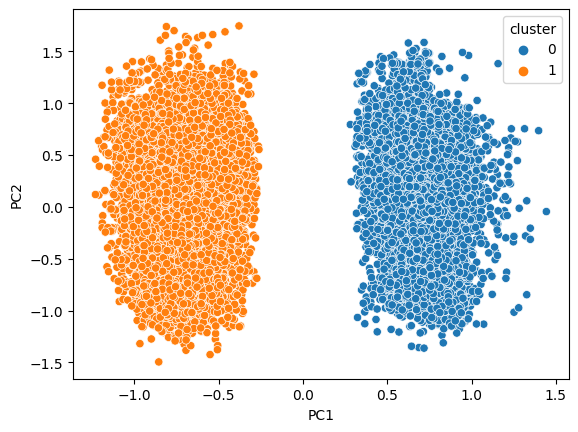

In [25]:
pca_data['cluster'] = pd.Categorical(sliced_data.cluster)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [26]:
pca3 = PCA(3)
pca_data = pd.DataFrame(pca3.fit_transform(sliced_data.iloc[:,0:sliced_data.shape[1]]),columns=['x','y','z']) 
pca_data['cluster'] = pd.Categorical(sliced_data.cluster)

In [27]:
import plotly.express as px

fig = px.scatter_3d(pca_data , x='x', y='y', z='z', color='cluster')
fig.show()

In [28]:
#TSNE : Compressing the weights to 3 dimensions to plot the data
tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=500, random_state=42)
new_values = tsne_model.fit_transform(sliced_data.iloc[:,0:sliced_data.shape[1]])

C:\Users\Palma\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\Palma\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [29]:
principalDf = pd.DataFrame(data = new_values, columns = ['x', 'y', 'z'])

In [30]:
principalDf['cluster'] = pd.Categorical(sliced_data.cluster)

In [31]:
fig = px.scatter_3d(principalDf , x='x', y='y', z='z', color='cluster')
fig.show()

In [32]:
data['counter'] = 1

In [33]:
cluster_index = pd.read_csv('data/cluster_index_KModes.csv')

In [34]:
data = pd.merge(data,cluster_index, on=['accountid','userid'])

In [35]:
data.to_csv('data/data4analytics.csv',index=False)